# Kernel Ridge Regression

## Ridge Regression standard

La méthode de régression Ridge est une méthode de "shrinkage" (réduction). Le but est de favoriser les solutions plus petites en ajoutant une pénalité sur leur norme : 

$\hat{\beta} = \underset{\beta}{argmin}\;\frac{1}{2n}\underset{i=1}{\overset{n}{\sum}}(y_i-\underset{j=1}{\overset{p}{\sum}}x_{ij}\beta_j)^2 + \frac{\lambda}{2}\underset{j=1}{\overset{p}{\sum}}\beta_j^2 = \underset{\beta}{argmin} \; \frac{1}{2n}||Y-X\beta||^2 + \frac{\lambda}{2}||\beta||^2 =: \underset{\beta}{argmin} \; \text{RSS}(\lambda)$,  avec $\lambda>0$ le paramètre de réduction.

On peut aussi écrire que ${RSS}(\lambda) = \frac{1}{2n}(Y-X\beta)^T(Y-X\beta) + \frac{\lambda}{2}\beta^T\beta$. On peut montrer que cette fonction admet un unique minimum :

- d'une part, $\partial_\beta = -\frac{1}{n}X^TY + \frac{1}{n}(X^TX+\lambda nI_p)\beta$ et $\partial^2_\beta = \frac{1}{n}X^TX + \lambda Ip > 0$, c'est-à-dire que RSS est strictement convexe.

- d'autre part, la fonction RSS est coercive, c'est-à-dire que $ \underset{||\beta||_2 \to +\infty}{\lim} RSS(\lambda) = +\infty$

Son unique minimum est alors donné par son unique point critique : 

$\partial_\beta = 0 \iff \hat{\beta} = (X^TX + \lambda nI_p)^{-1}X^TY$


## Kernel Ridge Regression

On peut généraliser cette méthode à des données non linéaires.
On considère un espace de Hilbert à noyau reproduisant $H$ associé à un noyau défini positif $k$.
Si l'on note $\hat{f}$ notre prédicteur, alors la fonction à minimiser devient :

$\hat{f} = \underset{f\in H}{argmin}\;\frac{1}{2n}\underset{i=1}{\overset{n}{\sum}}(y_i-f(x_i))^2 + \frac{\lambda}{2}||f||^2_H$

où $||.||_H$ est la norme associée à l'espace $H$.

Par le théorème du représentant, les solutions du problèmes peuvent s'écrire :

$\hat{f}(x) = \underset{i=1}{\overset{n}{\sum}} \alpha_i <x_i,x>_H = \underset{i=1}{\overset{n}{\sum}} \alpha_i k(x_i,x)$

Puis, si l'on note $K$ la matrice $(k(x_i,x_j))_{ij}$, on a $(\hat{f}(x_1),...,\hat{f}(x_n))^T = K\alpha$ et $||\hat{f}||_H^2 = \alpha^TK\alpha$.

Le problème peut ainsi se réécrire : 

$\hat{f} = \underset{f\in H}{argmin}\;\frac{1}{2n}(K\alpha-Y)^T(K\alpha-Y) + \frac{\lambda}{2}\alpha^TK\alpha$

De la même manière que précédemment, on montre que l'unique solution vérifie :

$\alpha = (K + \lambda nI_p)^{-1}Y$


### Application sur des données non linéaires

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

#Data
n_samples = 500
train_size = 2*n_samples//3
X = np.array([ [x] for x in np.linspace(0,10,n_samples)])
y = np.sin(X).ravel() + npr.random(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Regardons l'évolution de la prédiction à mesure que l'on change de noyau. Pour un noyau linéaire, la prédiction est clairement très mauvaise : 

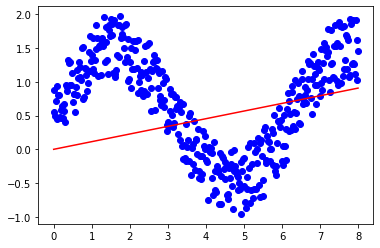

In [7]:
krr = KernelRidge()
krr.fit(X_train, y_train)
y_pred = krr.predict(X_train)
_ = plt.scatter(X_train,y_train,c='b')
_ = plt.plot(X_train,y_pred,c='r')

Le noyau rbf offre une bien meilleure prédiction :

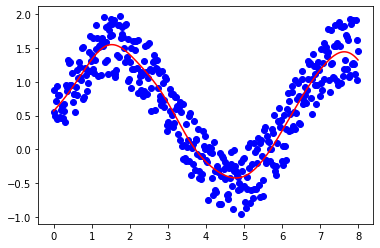

In [6]:
krr2 = KernelRidge(alpha=1,kernel='rbf')
krr2.fit(X_train, y_train)
y_pred = krr2.predict(X_train)
_ = plt.scatter(X_train,y_train,c='b')
_ = plt.plot(X_train,y_pred,c='r')

On peut affiner notre recherche par validation croisée :

Meilleurs paramètres :  {'alpha': 0.01, 'gamma': 0.16681005372000587, 'kernel': 'rbf'}
Erreur de validation :  0.4721902029798433
Erreur de test :  0.1175521627052898


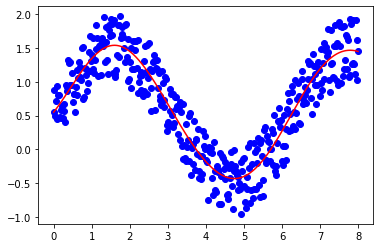

In [8]:
from sklearn.model_selection import GridSearchCV
krCV = GridSearchCV(
    KernelRidge(),
    param_grid = {
        "alpha": [1, 0.1, 1e-2, 1e-3, 1e-4],
        "gamma": np.logspace(-1, 1, 10),
        'kernel':['linear', 'rbf', 'poly']
        }
)

krCV.fit(X_train, y_train)
print("Meilleurs paramètres : ", krCV.best_params_)
print("Erreur de validation : ", krCV.best_score_)
y_pred = krCV.predict(X_train)
_ = plt.scatter(X_train,y_train,c='b')
_ = plt.plot(X_train,y_pred,c='r')
print("Erreur de test : ", mean_squared_error(y_test, krCV.predict(X_test)))

### Même procédure sur un deuxième jeu de données

In [9]:
y2 = np.sum(X + X**2 + X**4/1000,axis=1) + 30*npr.random(len(X))
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, shuffle=False)

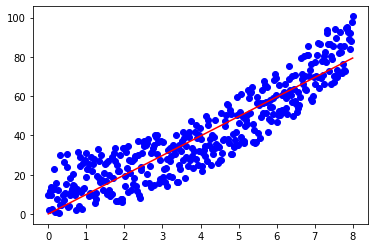

In [10]:
#Kernel Ridge Estimator
krr4 = KernelRidge(alpha=1)
krr4.fit(X_train, y2_train)
y2_pred = krr4.predict(X_train)
_ = plt.scatter(X_train,y2_train,c='b')
_ = plt.plot(X_train,y2_pred,c='r')

Meilleurs paramètres :  {'alpha': 0.1, 'kernel': 'poly'}
Erreur de validation :  0.20250390477084368
Erreur de test :  88.8541311062204


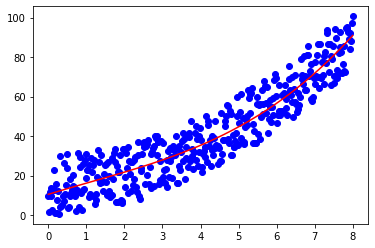

In [13]:
from sklearn.model_selection import GridSearchCV
krCV2 = GridSearchCV(
    KernelRidge(),
    param_grid={"alpha":np.linspace(0.1,20,100), 'kernel':['rbf','poly']}
)

krCV2.fit(X_train, y2_train)
print("Meilleurs paramètres : ", krCV2.best_params_)
print("Erreur de validation : ", krCV2.best_score_)
y2_pred = krCV2.predict(X_train)
_ = plt.scatter(X_train,y2_train,c='b')
_ = plt.plot(X_train,y2_pred,c='r')
print("Erreur de test : ", mean_squared_error(y2_test, krCV2.predict(X_test)))